# Rainfall occurance and Av.Temperature Prediction

**Contents** :
* Overview
* Importing Req. libraries and Weather Dataset.
* Data description.
* Data Visualization and Analysis.
    *  *Feature analysis*
    *  *EDA *
* Data Preprocessing.
    *  *Standardize the variables*
    *  *Transforming the Categorial variables*
* Rainfall Occurance Prediction
    *  *Training Data and Test Data*
    *  *Logistic Regression Model*
    *  *Decision Tree Classification Model*
    *  *KNN Classification Model*
    *  *Random Forest Classification Model*
    *  *SVM Classification Model*
    *  *Ensembled of the above classification models*
    *  *Classification Report on Ranfall Occurance Prediction*
* Av.Temperature Prediction
    *  *Linear Regression*
    *  *SVM Regression Model*
    *  *Random Forest Regression Model*
    *  *Ensembled of the above Regression Models*
    *  *Regression report on average temperature prediction*

    

# Overview




We employ a varied collection of five separate machine learning models to perform predictive analyses on a historical dataset concerning rainfall, minimum, and maximum temperatures. These models are distinguished by their individual methodologies, each possessing unique strengths and capabilities. Our strategy involves integrating both classification and regression algorithms, thereby encompassing a comprehensive range of techniques to effectively tackle the complexities associated with this multifaceted task.

 for Prediction of Occurance of Rainfall ,we employ following models:
>   * Logistic Regression
>   * Decision Tree Classification
>   * Random Forest Classification
>   * K-Nearest Neighbors
>   * Support Vector Classifie
>   * Ensemble Classifier 

 for Forecasting of Av. Temperature ,we will use :
>   * Linear Regression
>   * SVM Reg. model
>   * Random forest Regression 

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
# to prevent warnings from showing up frequently
import warnings
warnings.filterwarnings('ignore')

# 1. Loading the Weather dataset

In [3]:
df=pd.read_csv('Weather_Data.csv')

In [4]:
df.head()

,Date,Temp9am,Temp3pm,MinTemp,MaxTemp,Rainfall,RainToday,Evaporation,Sunshine,WindGustDir,...,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm
0,01-02-13,20.7,20.9,19.5,22.4,15.6,Yes,6.2,0.0,W,...,S,SSW,17,20,92,84,1017.6,1017.4,8,8
1,02-02-13,22.4,24.8,19.5,25.6,6.0,Yes,3.4,2.7,W,...,W,E,9,13,83,73,1017.9,1016.4,7,7
2,03-02-13,23.5,23.0,21.6,24.5,6.6,Yes,2.4,0.1,W,...,ESE,ESE,17,2,88,86,1016.7,1015.6,7,8
3,04-02-13,21.4,20.9,20.2,22.8,18.8,Yes,2.2,0.0,W,...,NNE,E,22,20,83,90,1014.2,1011.8,8,8
4,05-02-13,22.5,25.5,19.7,25.7,77.4,Yes,4.8,0.0,W,...,NNE,W,11,6,88,74,1008.3,1004.8,8,8


# 2. Description of Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3271 entries, 0 to 3270
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3271 non-null   object 
 1   Temp9am        3271 non-null   float64
 2   Temp3pm        3271 non-null   float64
 3   MinTemp        3271 non-null   float64
 4   MaxTemp        3271 non-null   float64
 5   Rainfall       3271 non-null   float64
 6   RainToday      3271 non-null   object 
 7   Evaporation    3271 non-null   float64
 8   Sunshine       3271 non-null   float64
 9   WindGustDir    3271 non-null   object 
 10  WindGustSpeed  3271 non-null   int64  
 11  WindDir9am     3271 non-null   object 
 12  WindDir3pm     3271 non-null   object 
 13  WindSpeed9am   3271 non-null   int64  
 14  WindSpeed3pm   3271 non-null   int64  
 15  Humidity9am    3271 non-null   int64  
 16  Humidity3pm    3271 non-null   int64  
 17  Pressure9am    3271 non-null   float64
 18  Pressure

In [6]:
df.describe()

,Temp9am,Temp3pm,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm
count,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000
mean,17.821461,21.543656,14.877102,23.005564,3.342158,5.175787,7.168970,41.476307,15.077041,19.294405,68.243962,54.698563,1018.334424,1016.003085,4.318557,4.176093
std,4.894316,4.297053,4.554710,4.483752,9.917746,2.757684,3.815966,10.806951,7.043825,7.453331,15.086127,16.279241,7.020090,7.019915,2.526923,2.411274
min,6.400000,10.200000,4.300000,11.700000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000
25%,13.800000,18.400000,11.000000,19.600000,0.000000,3.200000,4.250000,35.000000,11.000000,15.000000,58.000000,44.000000,1013.700000,1011.300000,2.000000,2.000000
50%,18.200000,21.300000,14.900000,22.800000,0.000000,4.800000,8.300000,41.000000,15.000000,19.000000,69.000000,56.000000,1018.600000,1016.300000,5.000000,4.000000
75%,21.700000,24.500000,18.800000,26.000000,1.400000,7.000000,10.200000,44.000000,20.000000,24.000000,80.000000,64.000000,1023.100000,1020.800000,7.000000,7.000000
max,36.500000,44.700000,27.600000,45.800000,119.400000,18.400000,13.600000,96.000000,54.000000,57.000000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000


# 3.Data visualization

# 3.1. *feature analysis*

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt


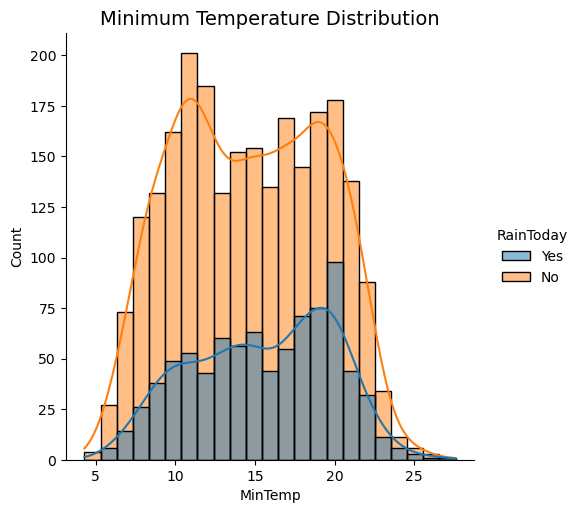

In [8]:
sns.displot(df, x="MinTemp", hue='RainToday', kde=True)
plt.title("Minimum Temperature Distribution", fontsize = 14)
plt.show()

> range of minimum temperature is from ;4.3 to 27.6 (*In degree celcius*).
> 11  and 20 (*in celcius*) minimum temperature has the highest frequency in the dataset.

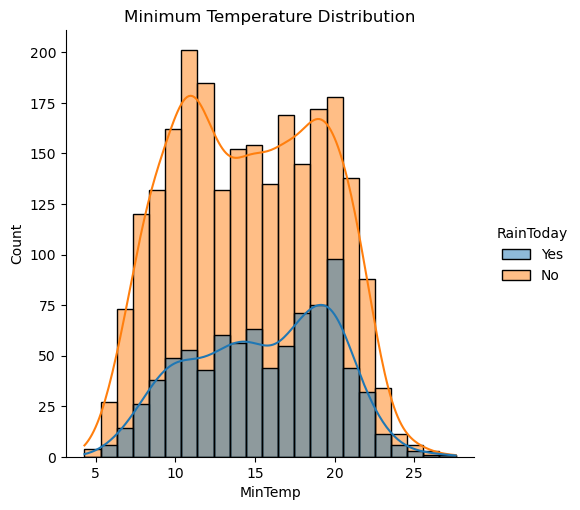

In [9]:
sns.displot(df, x="MinTemp", hue='RainToday', kde=True)
plt.title("Minimum Temperature Distribution")
plt.show()

On the other hand, the range of maximum temperature is from 11.7 to 45.8 and 25 maximum temperature has the highest frequency in the dataset.
Note : here also all values are in *degree celcius*

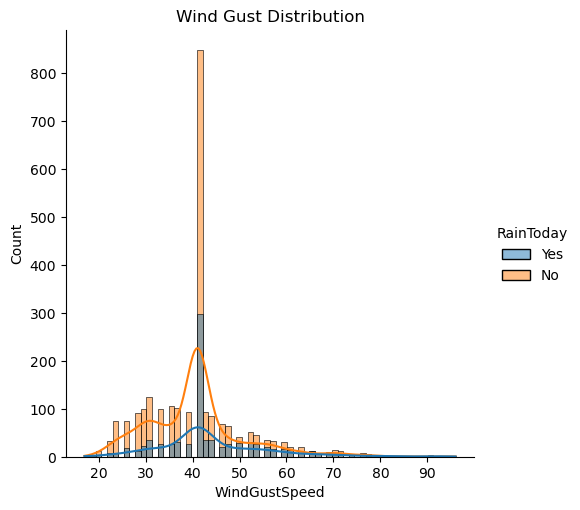

In [10]:
sns.displot(df, x="WindGustSpeed", hue='RainToday', kde=True)
plt.title("Wind Gust Distribution")
plt.show()

This distplot clearly shows that in case of Rain then there was quite less frequency of windgust camparre to the case when there is no Rain. 

During the analysis, it has also been found that the range of strong wind gusts is from 17 compass points to 97 compass points and 43 compass points of wind gusts have the highest frequency in the dataset.

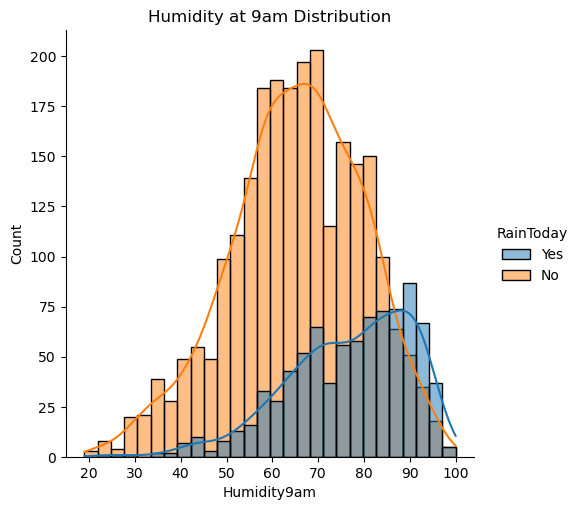

In [11]:
sns.displot(df, x="Humidity9am", hue='RainToday', kde=True)
plt.title("Humidity at 9am Distribution")
plt.show()

here it has been found that the range of humidity at 9 am and 3 pm is from *19% to 100%* approximately and** 70*%* of humidity at 9 am has the highest frequency in the dataset.

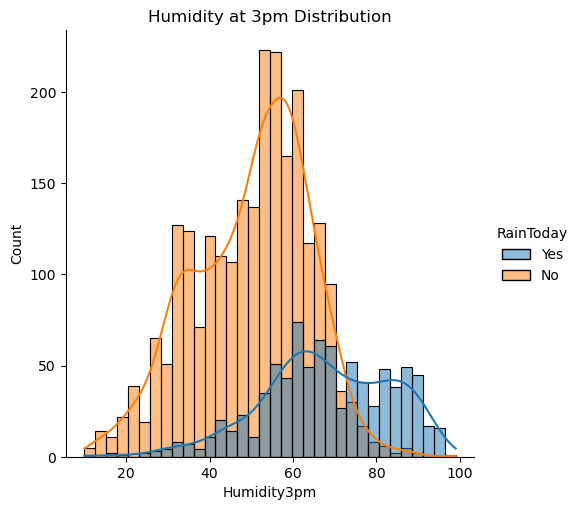

In [12]:
sns.displot(df, x="Humidity3pm", hue='RainToday', kde=True)
plt.title("Humidity at 3pm Distribution")
plt.show()

On the other hand, 47.58% of humidity at 3 pm has the highest frequency in the dataset.

In similiar way we can plot for windspeed at 3am and 9 am.
the corresponding findings are :
**range of wind speed at 9 am** =  *0 kmph to 57 kmph*,** Max.freq**.=*12kmph*
**range of wind speed at 3 am** =  *0 kmph to 57 kmph*, **Max.freq**.=*19kmph*

# 3.2.  E.D.A

# 3.2.1. *average wind speed analysis*:

In [13]:
# Here we will apply groupby method(over Month) to find average morning and afternoon windspeed.

windspeed_weather_df = df.groupby(df['Date'].str[3:5])[['WindSpeed9am', 'WindSpeed3pm']].mean()
windspeed_weather_df = windspeed_weather_df.reset_index()
windspeed_weather_df.head()

,Date,WindSpeed9am,WindSpeed3pm
0,01,15.285171,17.403042
1,02,15.468504,18.228346
2,03,15.989247,18.053763
3,04,16.466667,19.396296
4,05,16.580645,18.419355


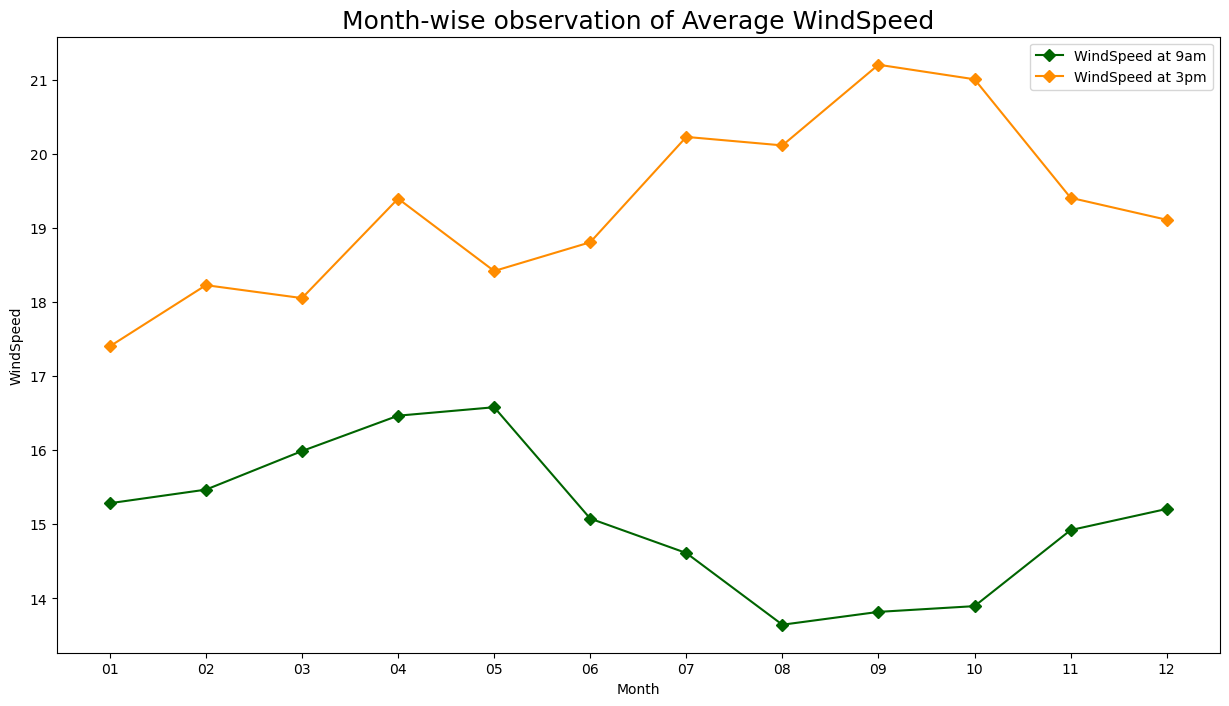

In [14]:
# Now we can plot these 2 col. to gain more insight
# we have options of seaborn and matplotlib for visualization ,here we use matplotlib.
x = windspeed_weather_df['Date']
y1 = windspeed_weather_df['WindSpeed9am'] 
y2 = windspeed_weather_df['WindSpeed3pm']

plt.figure(figsize = (15, 8))

plt.plot(x, y1, marker='D', color = 'darkgreen', label = 'WindSpeed at 9am') 
plt.plot(x, y2, marker='D', color = 'darkorange', label = 'WindSpeed at 3pm')

plt.xlabel('Month')
plt.ylabel('WindSpeed')
plt.title('Month-wise observation of Average WindSpeed', fontsize = 18)
plt.legend(fontsize = 10, loc = 'best')
plt.show()

During this analysis, it has been found that the wind speed between the **month of May and June** at 9 am has the **highest wind speed** at **16.5 kmph**. On the other hand, at 3 pm between **month August and September** has **the highest wind speed at 21.77 kmph**. Finally, it can be concluded that the wind speed at 3 pm is much higher than the wind speed at 9 am.

# 3.2.2. *average humidity analysis*

In [15]:
humidity_weather_df = df.groupby(df['Date'].str[3:5])[['Humidity9am', 'Humidity3pm']].mean()
humidity_weather_df = humidity_weather_df.reset_index()
humidity_weather_df.tail()

,Date,Humidity9am,Humidity3pm
7,08,64.164875,52.867384
8,09,65.844444,56.100000
9,10,71.197133,59.139785
10,11,70.500000,58.514815
11,12,70.007168,55.211470


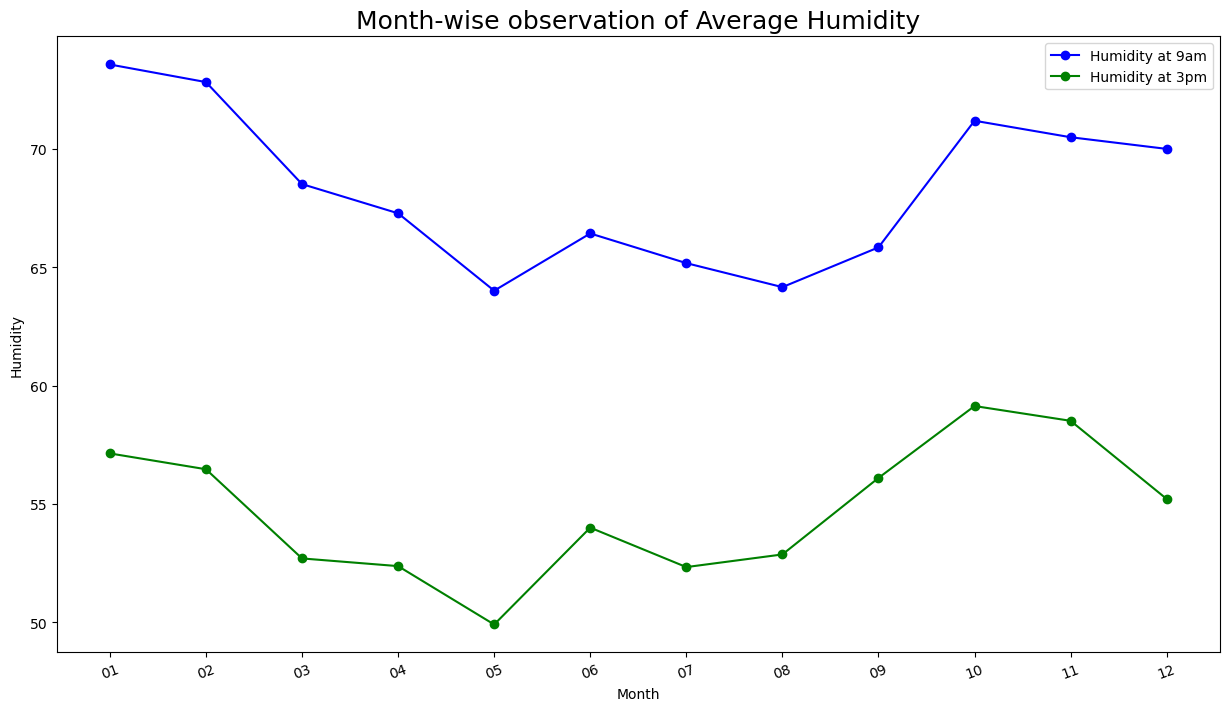

In [16]:
x = humidity_weather_df['Date']
y1 = humidity_weather_df['Humidity9am'] 
y2 = humidity_weather_df['Humidity3pm']

plt.figure(figsize = (15, 8))

plt.plot(x, y1, color = 'blue',marker='o',label = 'Humidity at 9am',alpha=1) 
plt.plot(x, y2, color = 'green',marker='o',label = 'Humidity at 3pm',alpha=1)

plt.xlabel('Month')
plt.ylabel('Humidity')
plt.title('Month-wise observation of Average Humidity', fontsize = 18)
plt.legend(fontsize = 10, loc = 'best')
plt.xticks(rotation=20)
plt.show()

During this analysis, it has been found that the **humidity between the month January and February** at 9 am has the highest humidity as **74.38%**. On the other hand, at 3 pm , between the **month September and October** has the highest humidity as **58.24%**. Finally, it can be concluded that humadity at 9 am is much higher than the humadity at 3 pm.

# 3.2.3 *average month-wise pressure analysis*

In [17]:
#Here also we use groupyby method along with some index slicing to categorise our req. data w.r.t 'month'
pressure_weather_df = df.groupby(df['Date'].str[3:5])[['Pressure9am', 'Pressure3pm']].mean()
pressure_weather_df = pressure_weather_df.reset_index()
pressure_weather_df.tail()

,Date,Pressure9am,Pressure3pm
7,08,1015.941577,1013.565789
8,09,1016.675556,1014.475100
9,10,1018.082079,1016.032258
10,11,1017.323704,1015.165185
11,12,1017.806093,1015.483871


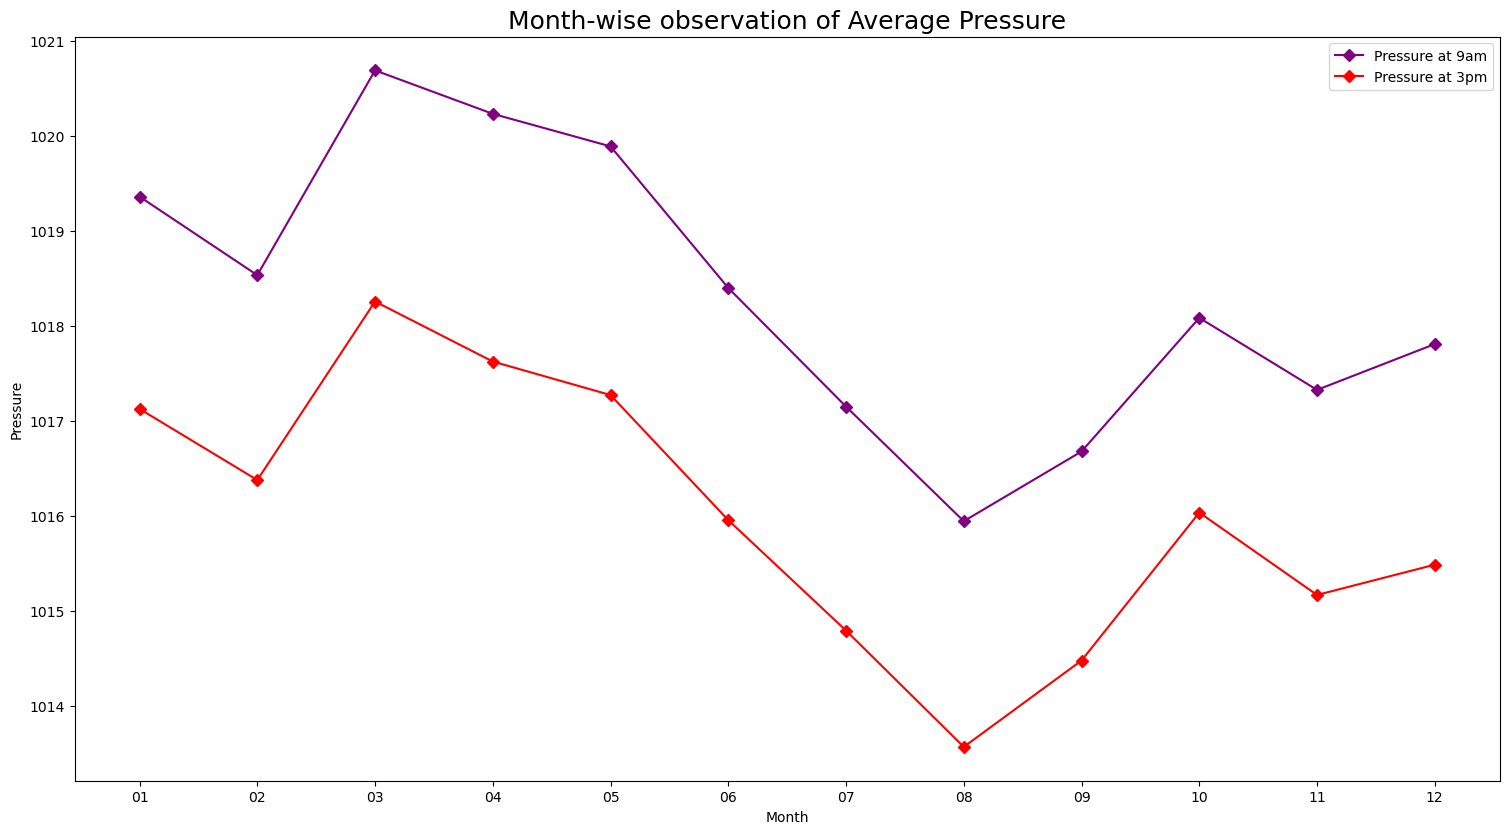

In [18]:
# Now we will use matplotlib for plotting the graph.
x = pressure_weather_df['Date']
y1 = pressure_weather_df['Pressure9am'] 
y2 = pressure_weather_df['Pressure3pm']

plt.figure(figsize = (15, 8))

plt.plot(x, y1,marker='D' ,color = 'purple', label = 'Pressure at 9am') 

plt.plot(x, y2,marker='D' ,color = 'red', label = 'Pressure at 3pm')
plt.tight_layout()
plt.xlabel('Month')
plt.ylabel('Pressure')

plt.title('Month-wise observation of Average Pressure', fontsize = 18)
plt.legend(fontsize = 10, loc = 'best')

plt.show()

During this analysis, it has been found that the pressure between the **month of March and April** at 9 am has the highest pressure as **1022.93 hPa**. On the other hand, at 3 pm, between the **month March and April** has the highest pressure as **1018.79 hPa**. Finally, it can be concluded that pressure at 9 am is much higher than the pressure at 3 pm.

# 3.2.4 *average month-wise temperature analysis*

In [19]:
# Again we apply same methodology as we used above to grab av.temp. values based on month
location_weather_df = df.groupby(df['Date'].str[3:5])[['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm']].mean()
location_weather_df = location_weather_df.reset_index()
location_weather_df

,Date,MinTemp,MaxTemp,Temp9am,Temp3pm
0,01,14.851331,22.621673,17.158555,21.422814
1,02,14.154331,21.984252,16.439764,20.783858
2,03,12.713620,21.339068,15.451971,20.127599
3,04,12.600000,21.145926,15.721111,19.736667
4,05,12.651971,21.878495,15.939785,20.335125
5,06,13.621852,22.000741,16.786296,20.429259
6,07,14.223297,22.521505,17.465591,20.882437
7,08,15.870251,24.025090,19.237276,22.390323
8,09,17.608148,25.315926,21.029630,23.648889
9,10,17.709319,24.853047,20.483154,23.400000


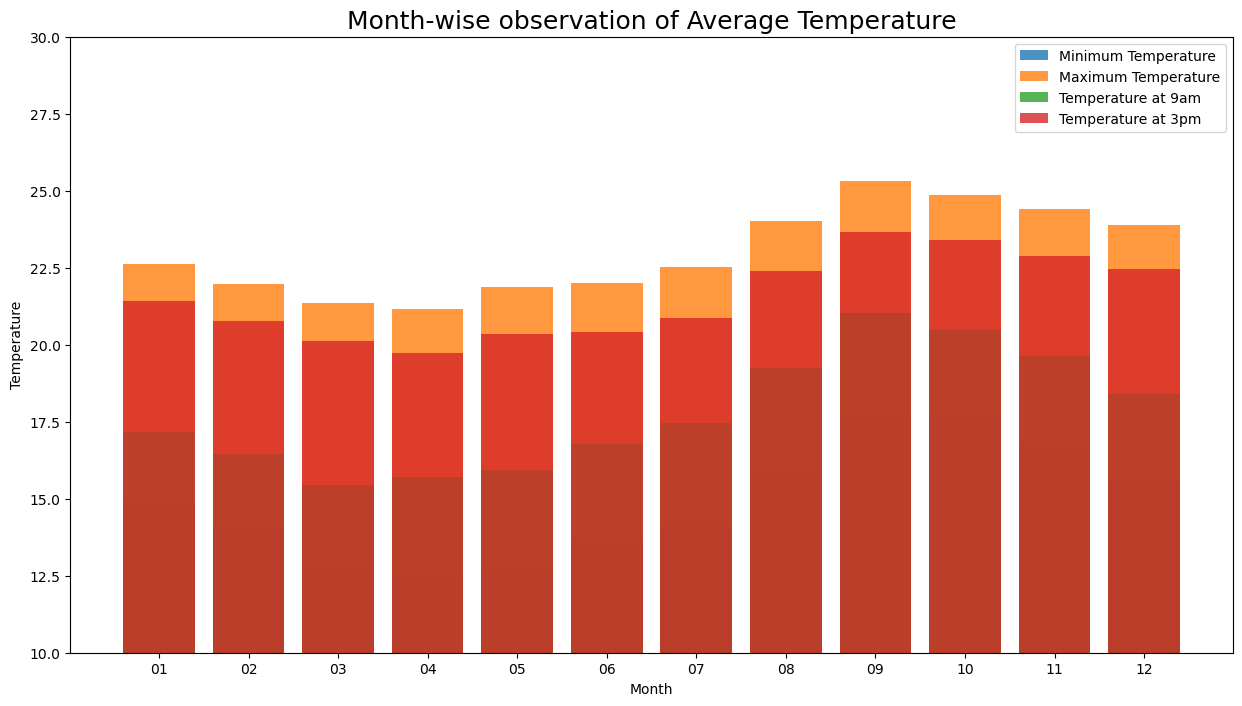

In [20]:
x = location_weather_df['Date']
y1 = location_weather_df['MinTemp'] 
y2 = location_weather_df['MaxTemp']
y3 = location_weather_df['Temp9am'] 
y4 = location_weather_df['Temp3pm']

plt.figure(figsize = (15, 8))

plt.bar(x, y1, label = 'Minimum Temperature', alpha = 0.8) 
plt.bar(x, y2, label = 'Maximum Temperature', alpha = 0.8) 
plt.bar(x, y3, label = 'Temperature at 9am', alpha = 0.8) 
plt.bar(x, y4, label = 'Temperature at 3pm', alpha = 0.8)

plt.ylim(10,30)

plt.xlabel('Month')
plt.ylabel('Temperature')
plt.title('Month-wise observation of Average Temperature', fontsize = 18)
plt.legend( loc = 'best')

plt.show()

as we see above all these instances of temerature , all of them basically follows similiar pattern with mostly **Sept-Oct** as the months having highest temperatures.

Now we will find correlation values.
However we first need to remove some colums from the dataset.

In [21]:
new_df=df.drop(columns=['Date','RainToday','WindGustDir', 'WindDir9am', 'WindDir3pm'])

In [22]:
# we can use .corr() method to find the correlation matrix.
new_df.corr()

,Temp9am,Temp3pm,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm
Temp9am,1.000000,0.828457,0.939307,0.858639,-0.054297,0.606122,0.113891,0.159570,-0.334084,0.280009,-0.145944,0.131855,-0.417437,-0.401353,0.093204,0.068683
Temp3pm,0.828457,1.000000,0.753147,0.960805,-0.142748,0.474599,0.345528,0.036216,-0.351836,0.136713,-0.155192,-0.212696,-0.342862,-0.387945,-0.086544,-0.144965
MinTemp,0.939307,0.753147,1.000000,0.771005,0.013995,0.569316,-0.063475,0.127792,-0.298040,0.225905,0.053946,0.273269,-0.391654,-0.353334,0.241248,0.164028
MaxTemp,0.858639,0.960805,0.771005,1.000000,-0.139306,0.510334,0.327422,0.073184,-0.349382,0.155542,-0.185382,-0.150741,-0.385853,-0.420375,-0.084695,-0.099217
Rainfall,-0.054297,-0.142748,0.013995,-0.139306,1.000000,-0.110343,-0.308962,0.149811,0.153696,0.039415,0.332636,0.305635,-0.037561,0.001780,0.245231,0.200999
Evaporation,0.606122,0.474599,0.569316,0.510334,-0.110343,1.000000,0.175932,0.245426,-0.077532,0.292469,-0.395651,-0.102295,-0.343581,-0.298303,-0.037051,-0.038422
Sunshine,0.113891,0.345528,-0.063475,0.327422,-0.308962,0.175932,1.000000,-0.029032,-0.058410,0.177813,-0.490631,-0.586476,-0.047789,-0.094507,-0.665014,-0.677861
WindGustSpeed,0.159570,0.036216,0.127792,0.073184,0.149811,0.245426,-0.029032,1.000000,0.256460,0.509825,-0.225613,-0.095037,-0.408876,-0.351850,0.024275,0.044016
WindSpeed9am,-0.334084,-0.351836,-0.298040,-0.349382,0.153696,-0.077532,-0.058410,0.256460,1.000000,0.197669,-0.189763,-0.148849,0.003737,0.091878,-0.062441,-0.018030
WindSpeed3pm,0.280009,0.136713,0.225905,0.155542,0.039415,0.292469,0.177813,0.509825,0.197669,1.000000,-0.288910,-0.135039,-0.333810,-0.277749,-0.050932,-0.095435


<Axes: >

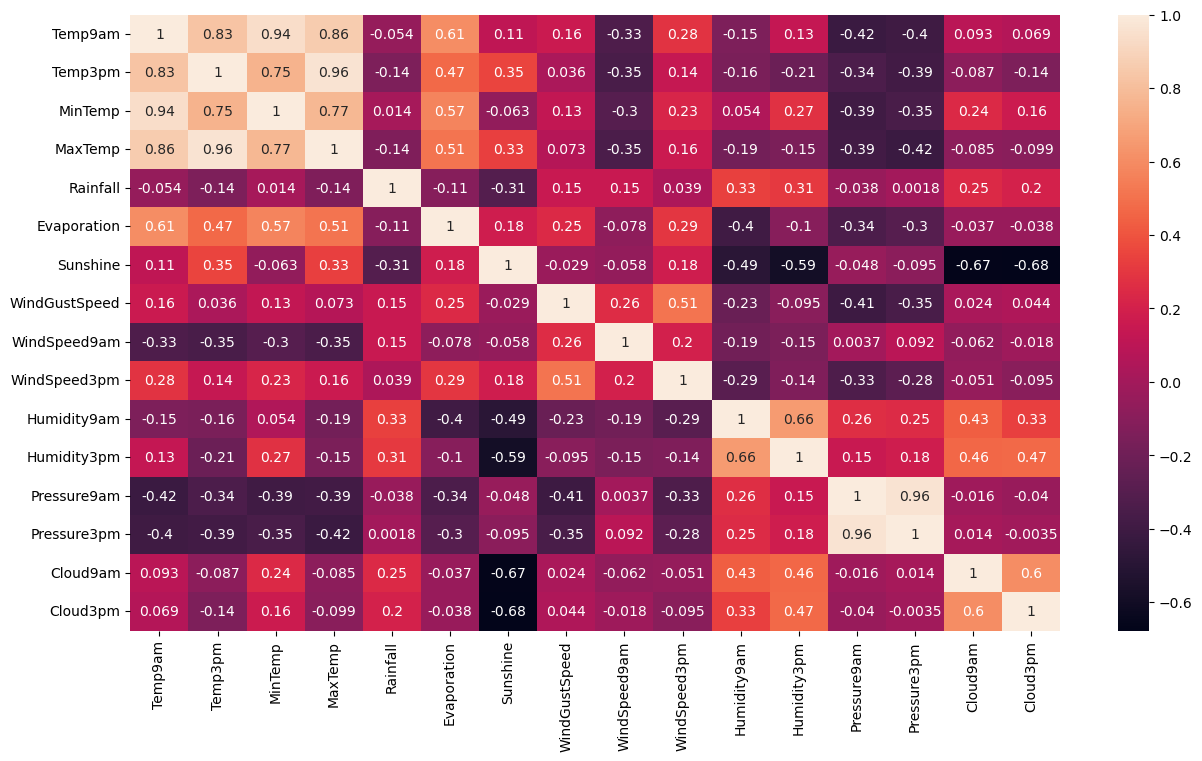

In [23]:
#corr matrix visualization
plt.figure(figsize=(15,8))
sns.heatmap(new_df.corr(),annot=True)

Above plot clearly inform us that some of values are highly correlated having values like Temp9am and Temp3am=0.83,Temp3am and Min temp =0.7.

# 4. Data preprocessing

# 4.1. *Standardize the Variables*

The scale of the variables matters ,Because the classifier and regressor predicts the class/values of a given test observation by identifying the observations that are nearest to it. Any variables that are on a large scale will have a much larger effect on the distance between the observation.
So we need to First standardize the data.


In [24]:
# Importing the Std. scaler from scikit learn.
from sklearn.preprocessing import StandardScaler

In [25]:
# Instantiating the std. scaler function
scaler = StandardScaler()


In [26]:
# To compute the mean and std to be used for later scaling.
scaler.fit(new_df)

scaled_features = scaler.transform(new_df)


In [27]:
# we will create a new dataframe containing scaled version of origina data.
new_df1= pd.DataFrame(scaled_features,columns=new_df.columns[:16])

# we also need to add dropped off columns during scaling.

add_columns = df[['Date','RainToday','WindGustDir', 'WindDir9am', 'WindDir3pm']]

# now we need to concat both columns together

std_df = pd.concat([new_df1,add_columns],axis=1)

std_df.head()



,Temp9am,Temp3pm,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Date,RainToday,WindGustDir,WindDir9am,WindDir3pm
0,0.588229,-0.149813,1.015126,-0.135078,1.236139,0.371460,-1.878965,-0.044081,0.273041,0.094683,...,1.800202,-0.104633,0.199024,1.457110,1.586088,01-02-13,Yes,W,S,SSW
1,0.935624,0.757924,1.015126,0.578719,0.268029,-0.644040,-1.171303,-0.044081,-0.862879,-0.844638,...,1.124391,-0.061892,0.056550,1.061312,1.171306,02-02-13,Yes,W,W,E
2,1.160409,0.338969,1.476258,0.333351,0.328536,-1.006719,-1.852755,-0.044081,0.273041,-2.320714,...,1.923076,-0.232857,-0.057429,1.061312,1.586088,03-02-13,Yes,W,ESE,ESE
3,0.731274,-0.149813,1.168837,-0.045853,1.558843,-1.079254,-1.878965,-0.044081,0.982991,0.094683,...,2.168826,-0.589032,-0.598829,1.457110,1.586088,04-02-13,Yes,W,NNE,E
4,0.956059,0.920852,1.059043,0.601025,7.468346,-0.136290,-1.878965,-0.044081,-0.578899,-1.783959,...,1.185828,-1.429605,-1.596144,1.457110,1.586088,05-02-13,Yes,W,NNE,W


# 4.2. *Transforming categorial variables*

we will use pandas *get dummies* to convert categorial feature to binary variables.

Note: we will not include **'RainToday column'** as it is our target variable

In [28]:
df_final = pd.get_dummies(data=std_df, columns=['WindGustDir', 'WindDir9am', 'WindDir3pm'])
df_final.head()

,Temp9am,Temp3pm,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,0.588229,-0.149813,1.015126,-0.135078,1.236139,0.371460,-1.878965,-0.044081,0.273041,0.094683,...,False,False,False,False,False,True,False,False,False,False
1,0.935624,0.757924,1.015126,0.578719,0.268029,-0.644040,-1.171303,-0.044081,-0.862879,-0.844638,...,False,False,False,False,False,False,False,False,False,False
2,1.160409,0.338969,1.476258,0.333351,0.328536,-1.006719,-1.852755,-0.044081,0.273041,-2.320714,...,False,False,False,False,False,False,False,False,False,False
3,0.731274,-0.149813,1.168837,-0.045853,1.558843,-1.079254,-1.878965,-0.044081,0.982991,0.094683,...,False,False,False,False,False,False,False,False,False,False
4,0.956059,0.920852,1.059043,0.601025,7.468346,-0.136290,-1.878965,-0.044081,-0.578899,-1.783959,...,False,False,False,False,False,False,False,True,False,False


Next, we replace the values of the 'RainToday' column changing them from a categorical column to a binary column. 

In [29]:
df_final['RainToday'] = df_final['RainToday'].apply(lambda x:0 if 'No' in x else 1)
df_final['RainToday'].head()
                                                    

0    1
1    1
2    1
3    1
4    1
Name: RainToday, dtype: int64

In [30]:
df_final.drop('Date',axis=1,inplace=True)

# 5. Rainfall Occurance Prediction:


For this first we need to split our data into Training and Test sets.

# 5.1. *Training and Test data split*

In [31]:
# we set our Feature data(input variables) as X and Target Variable as y
X=df_final.drop('RainToday',axis=1)
y=df_final['RainToday']


In [32]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=101,test_size=0.33)

Here we have used **train_test_split** function to split the features X and y dataframes with a test_size of **0.35** and the random_state set to **101.**

we are now ready to apply our Algorithms.

# 5.2 **Logistic Regression model**


In [33]:
from sklearn.linear_model import LogisticRegression
# create the instance
LR=LogisticRegression()
LR.fit(X_train,y_train)    # fit the data



LogisticRegression()

# 5.3. **Dicision tree Classification Model**

In [34]:
from sklearn.tree import DecisionTreeClassifier

d_tree = DecisionTreeClassifier()    # creating the instance
d_tree.fit(X_train,y_train)   # fitting our training data

DecisionTreeClassifier()

# 5.4. **KNN Classifier Model**

In [35]:
# Importing req. libraries
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=4)
KNN.fit(X_train, y_train)   # fitting the data

KNeighborsClassifier(n_neighbors=4)

In [52]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,KNN.predict(X_test.values)))

ValueError: X has 61 features, but KNeighborsClassifier is expecting 64 features as input.

# 5.5. **Random Forest Classification model**

In [36]:
from sklearn.ensemble import RandomForestClassifier

Rfc = RandomForestClassifier(n_estimators=50)
Rfc.fit(X_train , y_train)

RandomForestClassifier(n_estimators=50)

# 5.6. **SVM Classification Model**

In [37]:
from sklearn import svm


SVM = svm.SVC(kernel='linear')
SVM.fit(X_train,y_train)

SVC(kernel='linear')

# 5.7.**Ensembled of the all five classification models**


In [38]:
#This model will predict the output according to voting based on the above 5 classification algorithms.
from sklearn.ensemble import VotingClassifier

Encm = VotingClassifier(estimators=[('lr',LR ), ('knn', KNN), ('dt', d_tree),('svc', SVM),('RFC', Rfc)],voting='hard')
Encm.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('knn', KNeighborsClassifier(n_neighbors=4)),
                             ('dt', DecisionTreeClassifier()),
                             ('svc', SVC(kernel='linear')),
                             ('RFC', RandomForestClassifier(n_estimators=50))])

Now instead of showing full classification report we rely only on accuracy and F1 score

# 5.8. **Classification Report on Rainfall occurance prediction **

In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score,mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import sklearn.metrics as metrics
# first we will find accuracy score of all 6 models.

LR_Accuracy_Score = metrics.accuracy_score(LR.predict(X_test),y_test)
KNN_Accuracy_Score = metrics.accuracy_score(KNN.predict(X_test.values),y_test)
d_tree_Accuracy_Score=metrics.accuracy_score(d_tree.predict(X_test.values),y_test)
SVM_Accuracy_Score=metrics.accuracy_score(SVM.predict(X_test.values),y_test)
Rfc_Accuracy_Score=metrics.accuracy_score(Rfc.predict(X_test.values),y_test)
Encm_Accuracy_Score=metrics.accuracy_score(Encm.predict(X_test.values),y_test)

# here we will find out f1 score.
LR_f1_Score = metrics.f1_score(LR.predict(X_test),y_test,)
KNN_f1_Score = metrics.f1_score(KNN.predict(X_test.values),y_test,average='weighted')
d_tree_f1_Score=metrics.f1_score(d_tree.predict(X_test.values),y_test)
SVM_f1_Score=metrics.f1_score(SVM.predict(X_test.values),y_test)
Rfc_f1_Score=metrics.f1_score(Rfc.predict(X_test.values),y_test)
Encm_f1_Score=metrics.f1_score(Encm.predict(X_test.values),y_test)

Comparision_df = {'Classification Algorithm': ['Logistic Regression','KNN', 'Decision Tree',  'SVM','Random Forest','Ensembled Classifier'],
          'Accuracy Score': [LR_Accuracy_Score,KNN_Accuracy_Score, d_tree_Accuracy_Score, SVM_Accuracy_Score, Rfc_Accuracy_Score,Encm_Accuracy_Score],
                  'f1_score':[LR_f1_Score,KNN_f1_Score,d_tree_f1_Score,SVM_f1_Score,Rfc_f1_Score,Encm_f1_Score]
          }
Report = pd.DataFrame(Comparision_df)
Report



,Classification Algorithm,Accuracy Score,f1_score
0,Logistic Regression,0.824074,0.616935
1,KNN,0.798148,0.823334
2,Decision Tree,0.760185,0.560272
3,SVM,0.833333,0.621849
4,Random Forest,0.835185,0.618026
5,Ensembled Classifier,0.839815,0.627957


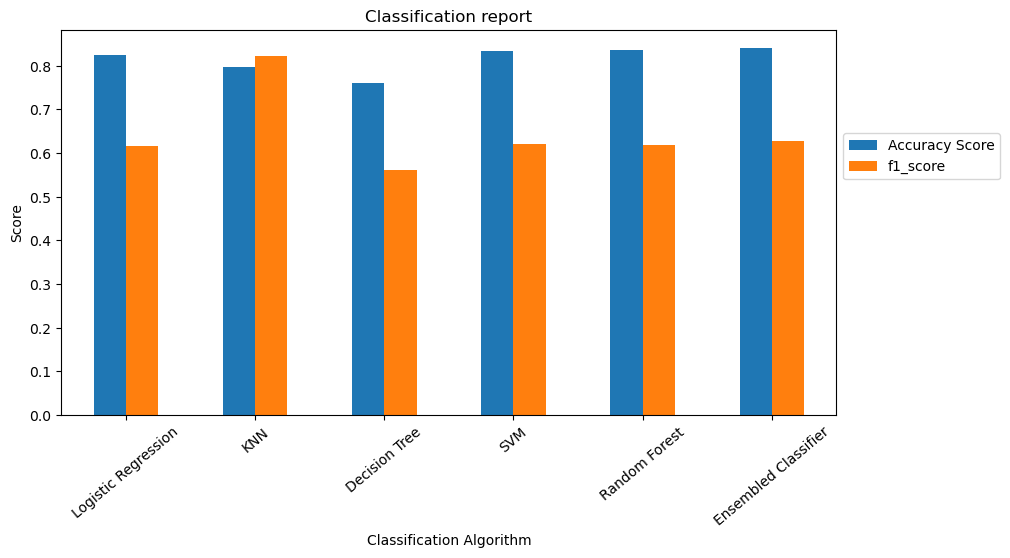

In [40]:
# Here we will visualize above reults.
Report[['Classification Algorithm', 'Accuracy Score', 'f1_score']].plot(title='Classification report',ylabel= 'Score',figsize=(10,5),kind='bar',x='Classification Algorithm')
plt.legend(bbox_to_anchor=(1.0, 0.75), loc="upper left")

plt.xticks(rotation=40)

plt.show()


Based on above chart our **Ensembled classifie**r performed best considering Accuracy score.
 but if we took into consideration then **KNN** performed better.

# 6. **Average Temperature of the day prediction **

**So, we have 4 columns related to temperature. We will first create a new Av.Temp column ,which then became our Target variable**.

In [41]:
# Creating new col. using average of 4 columns.
df_final['Av.Temp'] = df_final[['Temp9am', 'Temp3pm','MinTemp','MaxTemp']].mean(axis=1)
df_final['Av.Temp'].head()

0    0.329616
1    0.821848
2    0.827247
3    0.426111
4    0.884245
Name: Av.Temp, dtype: float64

In [42]:
df_final = df_final.astype(float)

In [43]:
# putting our feature variable as "X" and Target variable as "y".
# Note : we will drop temp variable volumns now.
X = df_final.drop(['Av.Temp','Temp9am', 'Temp3pm','MinTemp','MaxTemp'],axis=1)
y = df_final['Av.Temp']

**Splitting the data for training and testing**

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=101,test_size=0.35)

# 6.1. **Linear Regression**

In [45]:
#importing linear regression from sklearn
from sklearn.linear_model import LinearRegression
Lr=LinearRegression()
Lr.fit(X_train,y_train)

LinearRegression()

# 6.2. **SVM Regression Model**

In [46]:
from sklearn.svm import SVR
SVR = SVR()
SVR.fit(X_train,y_train)

SVR()

# 6.3.**Random Forest Regression Model**

In [47]:
from sklearn.ensemble import RandomForestRegressor

Rfr = RandomForestRegressor()
Rfr.fit(X_train,y_train)

RandomForestRegressor()

# 6.4.**Ensembled of Above Regression Models**

In [48]:
from sklearn.ensemble import VotingRegressor

Enrm = VotingRegressor(estimators=[('LinearReg',Lr),('RandomForest', Rfr), ('SVR',SVR)],weights=[1,2,3]
                      )

Enrm.fit(X_train,y_train)

VotingRegressor(estimators=[('LinearReg', LinearRegression()),
                            ('RandomForest', RandomForestRegressor()),
                            ('SVR', SVR())],
                weights=[1, 2, 3])

# 6.5. **Regression report on average temperature prediction**

In [49]:
Lr_MAE = metrics.mean_absolute_error(Lr.predict(X_test), y_test)
Lr_RMSE = metrics.mean_squared_error(Lr.predict(X_test), y_test, squared=False)

Rfr_MAE = metrics.mean_absolute_error(Rfr.predict(X_test), y_test)
Rfr_RMSE = metrics.mean_squared_error(Rfr.predict(X_test), y_test, squared=False)

SVM_MAE = metrics.mean_absolute_error(SVR.predict(X_test), y_test)
SVM_RMSE = metrics.mean_squared_error(SVR.predict(X_test), y_test, squared=False)

Enrm_MAE = metrics.mean_absolute_error(Enrm.predict(X_test), y_test)
Enrm_RMSE = metrics.mean_squared_error(Enrm.predict(X_test), y_test, squared=False)

Report1 = {'Regression Algorithm': ['Linear Regression','Random Forest', 'SVM','Ensemble Regression'],
          'MAE': [Lr_MAE,Rfr_MAE, SVM_MAE,Enrm_MAE],
          'RMSE': [Lr_RMSE,Rfr_RMSE, SVM_RMSE,Enrm_RMSE],}
Report1 = pd.DataFrame(Report1)
Report1

,Regression Algorithm,MAE,RMSE
0,Linear Regression,0.470596,0.603210
1,Random Forest,0.449394,0.570866
2,SVM,0.434701,0.560317
3,Ensemble Regression,0.426009,0.546231


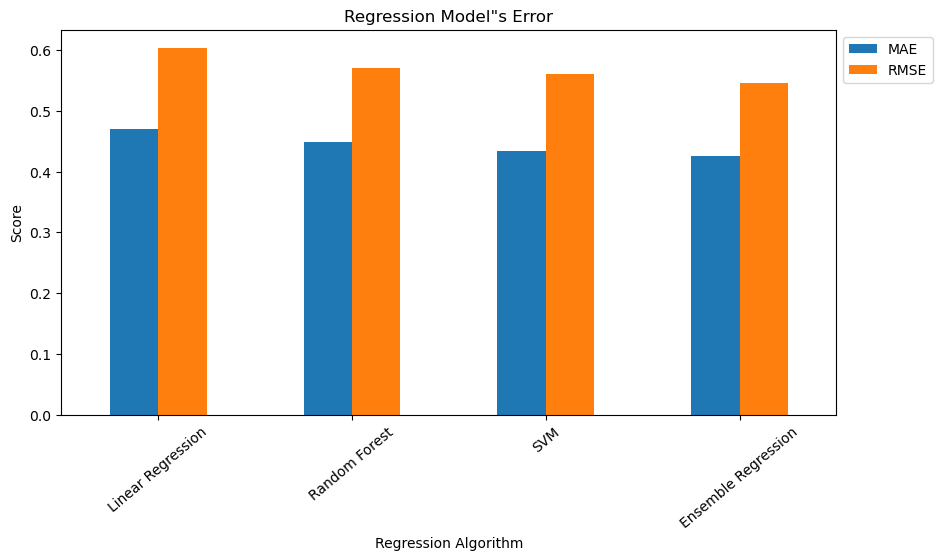

In [50]:
# Visualizing av. temperature predicting models performance
Report1[['Regression Algorithm', 'MAE', 'RMSE']].plot(title='Regression Model"s Error',ylabel= 'Score',figsize=(10,5),kind='bar',x='Regression Algorithm')
plt.legend(bbox_to_anchor=(1.0, 1.0), loc="upper left")

plt.xticks(rotation=40)

plt.show()
